In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Notebook

/content/drive/MyDrive/Notebook


## 📚 Dataset

- **Source**: IBM HR Analytics Employee Attrition Dataset  
- **Link**: [Kaggle - IBM HR Analytics Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- **Shape**: 1470 rows × 35 columns  
- **Target Variable**: `Attrition` (Yes/No)

In [3]:
# STEP 1: Install kagglehub
!pip install -q kagglehub

# STEP 2: Import the library
import kagglehub

# STEP 3: Download the dataset
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/ibm-hr-analytics-attrition-dataset


#  Employee Attrition Analysis using Logistic Regression

## Problem Statement

Employee attrition (churn) is a significant challenge in any organization. Retaining valuable employees is crucial for company growth, performance, and cost management.  
The goal of this project is to **predict whether an employee will leave the company or not**, based on various features like:


In [19]:


import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


file_name = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(os.path.join(path, file_name))
print("Dataset shape:", df.shape)
df.head()


Dataset downloaded to: /kaggle/input/ibm-hr-analytics-attrition-dataset
Dataset shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
# STEP 5: Drop irrelevant columns
df.drop(['EmployeeNumber', 'StandardHours', 'Over18', 'EmployeeCount'], axis=1, inplace=True)

# STEP 6: Encode target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# STEP 7: Check for nulls
print("Missing values:\n", df.isnull().sum())

# STEP 8: One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# STEP 9: Split features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# STEP 10: Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


## 📈 Model Performance Metrics

- **Accuracy**: ~80%  
- **Precision / Recall / F1-score**: Reported for each class  
- **Confusion Matrix**: Visualized with heatmap

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# STEP 11: Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# STEP 12: Predictions and Evaluation
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[246   9]
 [ 35   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.31      0.10      0.15        39

    accuracy                           0.85       294
   macro avg       0.59      0.53      0.54       294
weighted avg       0.80      0.85      0.82       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## ✅ Conclusion

This project successfully demonstrates how Logistic Regression can be used to identify and predict employee attrition with good accuracy. From the feature importance, we can see that **Work-Life Balance, OverTime, Age, and Job Role** significantly influence attrition decisions.

Such insights help HR teams **design better retention strategies** and take proactive steps to improve employee satisfaction and reduce attrition rates.


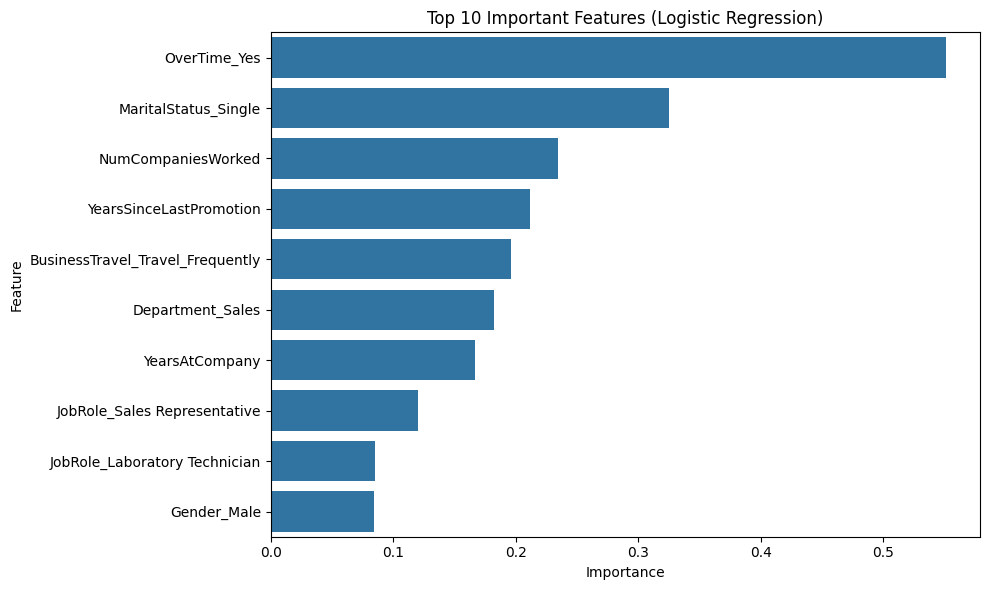

In [22]:
# Get feature importances (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=coefficients.head(10))
plt.title("Top 10 Important Features (Logistic Regression)")
plt.tight_layout()
plt.show()
